In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("telecom_users.csv")

In [82]:
columns = df.columns

In [83]:
for i in columns:
    df[i] = LabelEncoder().fit_transform(df[i])

In [84]:
data = df.iloc[:,:-1]
label = df.iloc[:,-1]

data = np.array(data)
label = np.array(label)

data.shape

(5986, 21)

In [85]:
from sklearn.utils.class_weight import compute_class_weight
weight_array = compute_class_weight('balanced', np.unique(label), label)  # y is the array containing your labels 

weight_dict = dict(zip(np.unique(label), weight_array))  # dictionary containing your weights

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[0 1], y=[0 0 1 ... 0 1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [86]:
model = Sequential([
    Dense(64, input_shape=(1,21), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation='sigmoid')
])

In [87]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

In [88]:
history = model.fit(data, label, validation_split=0.2, epochs = 50,class_weight=weight_dict )

Epoch 1/50
150/150 [==============================] - 2s 4ms/step - loss: 13.4712 - accuracy: 0.5291 - recall_2: 0.5535 - val_loss: 2.6862 - val_accuracy: 0.7554 - val_recall_2: 0.1111
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 3.2819 - accuracy: 0.5852 - recall_2: 0.5574 - val_loss: 1.2486 - val_accuracy: 0.6728 - val_recall_2: 0.5791
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 1.8440 - accuracy: 0.6199 - recall_2: 0.6104 - val_loss: 1.3233 - val_accuracy: 0.7362 - val_recall_2: 0.2862
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 1.9926 - accuracy: 0.6349 - recall_2: 0.6220 - val_loss: 1.6627 - val_accuracy: 0.5801 - val_recall_2: 0.8384
Epoch 5/50
150/150 [==============================] - 0s 963us/step - loss: 1.7063 - accuracy: 0.6264 - recall_2: 0.6630 - val_loss: 1.4814 - val_accuracy: 0.7588 - val_recall_2: 0.1212
Epoch 6/50
150/150 [==============================] - 0s 944us/step - loss: 1

150/150 [==============================] - 0s 931us/step - loss: 0.5902 - accuracy: 0.7105 - recall_2: 0.7229 - val_loss: 0.5761 - val_accuracy: 0.7070 - val_recall_2: 0.8047
Epoch 40/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.6827 - recall_2: 0.7036 - val_loss: 0.4498 - val_accuracy: 0.7771 - val_recall_2: 0.5185
Epoch 41/50
150/150 [==============================] - 0s 924us/step - loss: 0.5918 - accuracy: 0.7189 - recall_2: 0.7201 - val_loss: 0.8419 - val_accuracy: 0.5943 - val_recall_2: 0.8990
Epoch 42/50
150/150 [==============================] - 0s 950us/step - loss: 0.6547 - accuracy: 0.6842 - recall_2: 0.7158 - val_loss: 0.4885 - val_accuracy: 0.7604 - val_recall_2: 0.6700
Epoch 43/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7089 - recall_2: 0.7366 - val_loss: 0.5250 - val_accuracy: 0.7321 - val_recall_2: 0.7441
Epoch 44/50
150/150 [==============================] - 0s 918us/step - loss: 0.57

dict_keys(['loss', 'accuracy', 'recall_2', 'val_loss', 'val_accuracy', 'val_recall_2'])


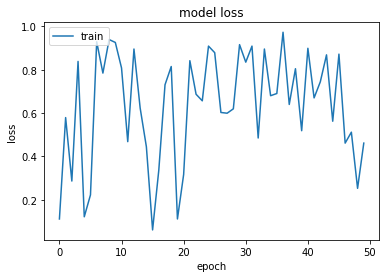

In [90]:
print(history.history.keys())
plt.plot(history.history['val_recall_2'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()